In [2]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**8 + c**2*b
diff(f, a)

8*a**7 + 5*b - cos(c)

In [3]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = (2*a) + (b**2)
diff(f, a)

2

In [4]:
from sympy import symbols, cos, diff

a, b, c, x = symbols('a b c x', real=True)
f = 2*a*x + (b**2)
diff(f, a, 2)

0

In [5]:
from sympy import symbols, cos, diff

x, y = symbols('x y', real=True)
f = (x**2) - (y**2)
# Вычисляем первые частные производные
df_dx = diff(f, x)  # Производная по x
df_dy = diff(f, y)  # Производная по y

# Вычисляем значения производных в точке M(-2, -1)
point = {x: -2, y: -1}
df_dx_M = df_dx.subs(point)
df_dy_M = df_dy.subs(point)

print(f"Частная производная df/dx в точке M(-2, -1): {df_dx_M}")
print(f"Частная производная df/dy в точке M(-2, -1): {df_dy_M}")

Частная производная df/dx в точке M(-2, -1): -4
Частная производная df/dy в точке M(-2, -1): 2


In [6]:
from sympy import symbols, cos, diff

a, b = symbols('a b', real=True)
f = (5 - a - 2*b)**2
diff(f, b)

4*a + 8*b - 20

In [7]:
from sympy import symbols, cos, diff

x, y = symbols('x y', real=True)
f = (x**2) + 3*x*y + (4*y**2)
# Вычисляем первые частные производные
df_dx = diff(f, x)  # Производная по x
df_dy = diff(f, y)  # Производная по y

# Вычисляем значения производных в точке
point = {x: 1, y: 1}
df_dx_M = df_dx.subs(point)
df_dy_M = df_dy.subs(point)

print(f"Частная производная df/dx в точке: {df_dx_M}")
print(f"Частная производная df/dy в точке: {df_dy_M}")

Частная производная df/dx в точке: 5
Частная производная df/dy в точке: 11


In [8]:
from sympy import symbols, cos, diff, sin

x, y = symbols('x y', real=True)
f = y*sin(x) + sin(y)
diff(f, y)

sin(x) + cos(y)

*****************

# Функция Розенброка

In [9]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

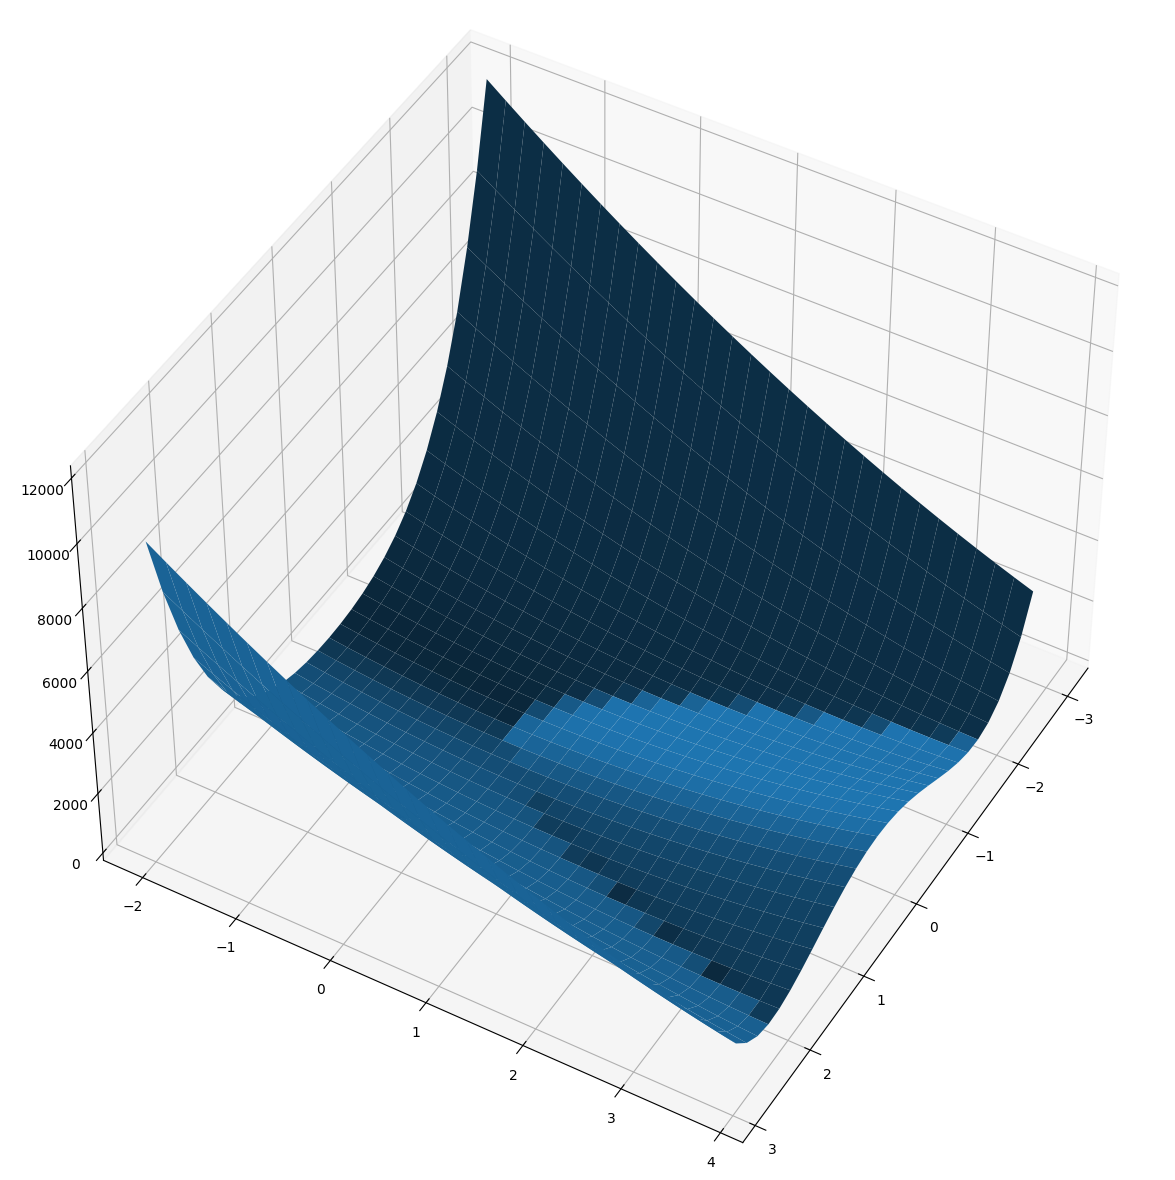

In [10]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

## метод Пауэлла

In [11]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


## метод Нелдера — Мида

In [12]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


In [13]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
res =  least_squares(func_rosen, x1)
print(res.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076162]


## Метод множителей Лагранжа

In [14]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [15]:
from sympy import symbols, solve

x, y, w = symbols('x y w')
f = (x - 2)**2 + (y - 1)**2  # Квадрат расстояния
constraint = x + y - 1
lagrangian = f + w * constraint

# Производные
fx = lagrangian.diff(x)
fy = lagrangian.diff(y)
fw = lagrangian.diff(w)

# Решение системы (возвращает словарь)
solutions = solve([fx, fy, fw], x, y, w)

# Извлекаем значения переменных из словаря
x_sol = solutions[x]
y_sol = solutions[y]
w_sol = solutions[w]

# Квадрат расстояния от (2, 1) до найденной точки (x_sol, y_sol)
distance_squared = (x_sol - 2)**2 + (y_sol - 1)**2
print(distance_squared)

2


In [16]:
from sympy import *

a,b,c,w=symbols('a b c w')
g = 2*(a*b + a*c + b*c)

L = 2*(a*b + a*c + b*c) + w*(a*b*c - 1)

L_a = L.diff(a)
L_b = L.diff(b)
L_c = L.diff(c)
L_w = L.diff(w)

print(solve([L_a, L_b, L_c, L_w], a, b, c, w)[0])

(1, 1, 1, -4)


*******************

In [17]:
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols

# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
C:\Users\User\AppData\Local\Temp\ipykernel_20960\3823877321.py:9: SyntaxWarning: invalid escape sequence '\l'
  "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True


******************************************************

# Градиент

In [18]:
import numpy as np

In [19]:
f = np.array([3, 7, 14, 23, 36, 47], dtype=float)
 
np.gradient(f)

# array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

In [20]:
print(f[1] - f[0], f[-1] - f[-2])

# (4.0, 11.0)

4.0 11.0


In [21]:
(f[2] - f[0])/2 # 5.5
(f[3] - f[1])/2 # 8.0
(f[4] - f[2])/2 # 11.0
(f[5] - f[3])/2 # 12.0

In [22]:
np.gradient(f, 2)

# array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))
#2.75
#4.0
#5.5
#6.0

2.75
4.0
5.5
6.0


*******************************

In [23]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [24]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [25]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [26]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

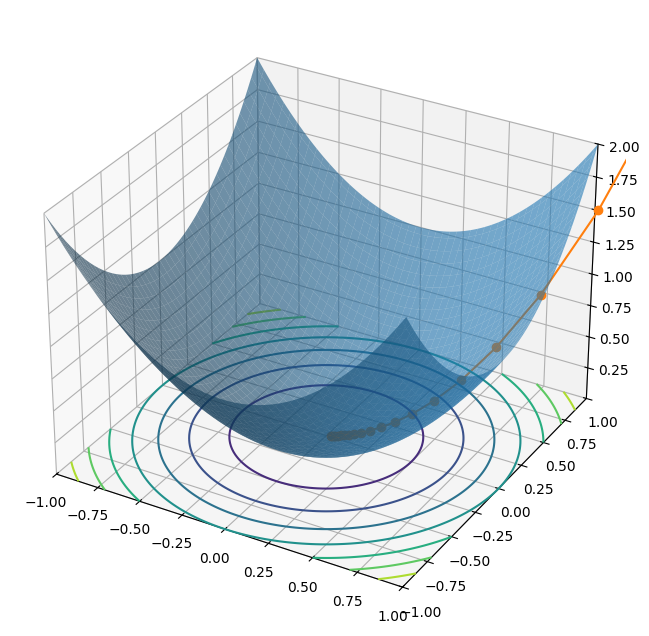

In [27]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

*******************

In [28]:
def f(x, y):
    return 2*x**2 - 4*x*y+ y**4 + 2
def grad(x, y):
    dx = 4 * x - 4*y
    dy = -4*x+4*y**3
    return (dx, dy)
x0 = (np.random.random(), np.random.random())
gamma = 0.1
x_cur = x0
 
vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    if i > 5000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
          f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")

iter=1; x=(0.28, 0.55); f(x)=1.63; grad f(x)=(-1.10, -0.43)
iter=2; x=(0.39, 0.60); f(x)=1.50; grad f(x)=(-0.83, -0.70)
iter=3; x=(0.47, 0.67); f(x)=1.38; grad f(x)=(-0.78, -0.70)
iter=4; x=(0.55, 0.74); f(x)=1.28; grad f(x)=(-0.75, -0.60)
iter=5; x=(0.63, 0.80); f(x)=1.19; grad f(x)=(-0.69, -0.47)
iter=6; x=(0.69, 0.84); f(x)=1.13; grad f(x)=(-0.60, -0.37)
iter=7; x=(0.75, 0.88); f(x)=1.08; grad f(x)=(-0.51, -0.28)
iter=8; x=(0.81, 0.91); f(x)=1.05; grad f(x)=(-0.42, -0.21)
iter=9; x=(0.85, 0.93); f(x)=1.03; grad f(x)=(-0.34, -0.16)
iter=10; x=(0.88, 0.95); f(x)=1.02; grad f(x)=(-0.27, -0.12)
iter=11; x=(0.91, 0.96); f(x)=1.01; grad f(x)=(-0.21, -0.10)
iter=12; x=(0.93, 0.97); f(x)=1.01; grad f(x)=(-0.16, -0.07)
iter=13; x=(0.94, 0.98); f(x)=1.00; grad f(x)=(-0.13, -0.06)
iter=14; x=(0.96, 0.98); f(x)=1.00; grad f(x)=(-0.10, -0.04)
iter=15; x=(0.97, 0.99); f(x)=1.00; grad f(x)=(-0.08, -0.03)
iter=16; x=(0.97, 0.99); f(x)=1.00; grad f(x)=(-0.06, -0.02)
iter=17; x=(0.98, 0.99); f(x)=1.0

***********************

In [29]:
def f(x, y, z):
    return x**3 - 2*x**2 + y**2 + z**2 -2*x*y + x*z -y*z + 3*z
def grad(x, y, z):
    dx = 3*x**2 - 4*x-2*y+z
    dy = 2*y-2*x-z
    dz = 2*z+x-y+3
    return (dx, dy, dz)
x0 = (1, 0, 0)
gamma = 0.1
x_cur = x0
 
vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1],
            x_cur[2] - gamma * grad(*x_cur)[2])
    if i > 5000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.4f}, {x_cur[1]:.4f}, {x_cur[2]:.4f});"
          f" f(x)={f(*x_cur):.4f}; grad f(x)=({grad(*x_cur)[0]:.4f}, {grad(*x_cur)[1]:.4f}, {grad(*x_cur)[2]:.4f})")

iter=1; x=(1.1000, 0.2000, -0.4000); f(x)=-2.8890; grad f(x)=(-1.5700, -1.4000, 3.1000)
iter=2; x=(1.2570, 0.3400, -0.7100); f(x)=-4.1901; grad f(x)=(-1.6779, -1.1240, 2.4970)
iter=3; x=(1.4248, 0.4524, -0.9597); f(x)=-5.1434; grad f(x)=(-1.4736, -0.9851, 2.0530)
iter=4; x=(1.5721, 0.5509, -1.1650); f(x)=-5.8137; grad f(x)=(-1.1405, -0.8775, 1.6912)
iter=5; x=(1.6862, 0.6387, -1.3341); f(x)=-6.2582; grad f(x)=(-0.8265, -0.7610, 1.3793)
iter=6; x=(1.7688, 0.7148, -1.4721); f(x)=-6.5418; grad f(x)=(-0.5905, -0.6361, 1.1100)
iter=7; x=(1.8279, 0.7784, -1.5831); f(x)=-6.7193; grad f(x)=(-0.4278, -0.5160, 0.8834)
iter=8; x=(1.8707, 0.8300, -1.6714); f(x)=-6.8290; grad f(x)=(-0.3158, -0.4100, 0.6979)
iter=9; x=(1.9022, 0.8710, -1.7412); f(x)=-6.8962; grad f(x)=(-0.2365, -0.3214, 0.5489)
iter=10; x=(1.9259, 0.9031, -1.7961); f(x)=-6.9372; grad f(x)=(-0.1787, -0.2495, 0.4306)
iter=11; x=(1.9438, 0.9281, -1.8391); f(x)=-6.9620; grad f(x)=(-0.1357, -0.1923, 0.3374)
iter=12; x=(1.9573, 0.9473, -1